<a href="https://colab.research.google.com/github/Kabirssss/BTP_DBSCAN-algorithm-from-scratch/blob/main/BTP_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.colors as mcolors

In [ ]:
class SetOfPoints:
    def __init__(self, X):
        self.X = X
        self.cl_ids = np.array(["UNCLASSIFIED"] * len(X))  # Initialize all points as UNCLASSIFIED
        self.steps = []

    def size(self):
        return len(self.X)

    def get(self, idx):
        class Point:
            def __init__(self, coordinates, cl_id):
                self.coordinates = coordinates
                self.cl_id = cl_id

        return Point(self.X[idx], self.cl_ids[idx])

    def region_query(self, point, eps):
        # Find all points within eps distance from the current point
        distances = euclidean_distances([point.coordinates], self.X).flatten()
        return np.where(distances < eps)[0]

    def change_cl_id(self, idx, cl_id):
        self.cl_ids[idx] = cl_id

    def change_cl_ids(self, indices, cl_id):
        self.cl_ids[indices] = cl_id


In [ ]:
def expand_cluster(set_of_points, point_idx, cl_id, eps, min_pts):
    seeds = set_of_points.region_query(set_of_points.get(point_idx), eps)

    if len(seeds) < min_pts:
        set_of_points.change_cl_id(point_idx, "NOISE")
        return False
    else:
        # Assign cluster ID to the seeds
        set_of_points.change_cl_ids(seeds, cl_id)
        seeds = set(seeds)  # Convert seeds to a set to avoid duplicates
        seeds.remove(point_idx)

        while seeds:
            current_p = seeds.pop()
            result = set_of_points.region_query(set_of_points.get(current_p), eps)

            if len(result) >= min_pts:
                for result_p in result:
                    if set_of_points.get(result_p).cl_id in {"UNCLASSIFIED", "NOISE"}:
                        if set_of_points.get(result_p).cl_id == "UNCLASSIFIED":
                            seeds.add(result_p)
                        set_of_points.change_cl_id(result_p, cl_id)

        return True

In [ ]:
def next_id(current_id):
    if current_id == "NOISE":
        return "1"
    else:
        return str(int(current_id) + 1)

In [ ]:
def dbscan(set_of_points, eps, min_pts):
    cluster_id = next_id("NOISE")

    for i in range(set_of_points.size()):
        point = set_of_points.get(i)

        if point.cl_id == "UNCLASSIFIED":
            if expand_cluster(set_of_points, i, cluster_id, eps, min_pts):
                cluster_id = next_id(cluster_id)

In [ ]:
# Now we apply this to the generated dataset
centers = [[2, 2], [-2, -2], [2, -2]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.7, random_state=1)
X = StandardScaler().fit_transform(X)

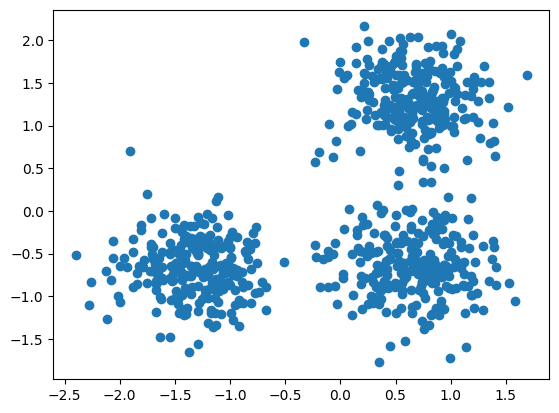

In [ ]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [ ]:
# Create the set_of_points object
set_of_points = SetOfPoints(X)

# Apply DBSCAN algorithm
eps = 0.3  # Choose the epsilon value (distance threshold)
min_pts = 10  # Minimum points to form a cluster

dbscan(set_of_points, eps, min_pts)

# Output the cluster IDs assigned
print(set_of_points.cl_ids)

['1' '1' '1' '1' '2' '3' '2' '2' '2' '1' '3' '3' '2' '3' '3' '2' '2' '3'
 '3' '3' '1' '3' '3' '2' '1' '1' '2' '2' '1' '3' '3' '3' '1' '3' '2' '2'
 '3' '1' '3' '2' '2' '1' '1' '2' '3' '3' '3' '2' '3' '3' '2' '2' '2' '2'
 '3' '1' '1' '2' '1' '3' '1' '1' '3' '1' '2' '3' '3' '3' '1' '3' '2' '2'
 '2' '2' '2' '2' '1' '1' '1' '2' '3' 'NOISE' '3' '2' '1' 'NOISE' '2' '2'
 '2' '1' '1' '2' '1' '2' '3' '3' '2' '2' '1' '1' '1' '3' '1' '2' '3' '2'
 '2' '3' '2' '2' '2' '1' '3' '1' '1' '1' '2' '1' '2' '1' '1' '1' '1' '2'
 '1' '1' 'NOISE' '1' '2' '1' '2' '1' '1' '2' '3' '2' '3' '3' '2' '2'
 'NOISE' '1' '1' '3' '1' '2' '3' 'NOISE' '1' '3' '2' '3' '3' '1' '3' '3'
 '1' '1' '2' '2' '3' '2' '2' '3' '3' '1' '3' '2' '3' '3' '1' '2' '1' '1'
 '3' '3' '2' '1' '2' '1' '3' '1' '2' '1' '2' '3' '2' '3' '3' '3' '3' '3'
 '2' '2' '1' '1' '1' '3' '3' '1' '1' '1' '2' '3' '1' '2' '1' '2' '1' '1'
 '3' '3' '3' 'NOISE' '3' '3' '1' '1' '1' '2' '2' '2' '1' '3' '2' '3' '2'
 '3' '3' '2' '1' '3' '3' '3' '3' '3' '3' '1' '2' '3' '1

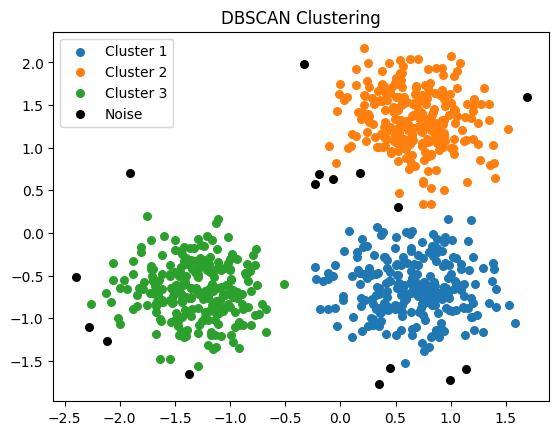

In [ ]:
# Convert cluster ids to numeric for coloring
unique_clusters = np.unique(set_of_points.cl_ids)
cluster_colors = {cl_id: idx for idx, cl_id in enumerate(unique_clusters)}

# Plot the clusters with different colors
for cl_id in unique_clusters:
    cluster_points = set_of_points.X[np.where(set_of_points.cl_ids == cl_id)]
    if cl_id == "NOISE":
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c='k', label='Noise', s=30)
    else:
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cl_id}', s=30)

plt.title('DBSCAN Clustering')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_dbscan_results(X, cl_ids):
    """
    Plots the data points before and after DBSCAN clustering.

    Parameters:
    - X (np.ndarray): The dataset, a 2D array of shape (n_samples, 2).
    - cl_ids (np.ndarray or list): Cluster labels for each point in X. Noise points should be labeled as "NOISE".
    """
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Plot before DBSCAN (unclustered data)
    ax[0].scatter(X[:, 0], X[:, 1], s=30, c='gray', marker='o')
    ax[0].set_title("Before DBSCAN")
    ax[0].set_xlabel("Feature 1")
    ax[0].set_ylabel("Feature 2")

    # Plot after DBSCAN
    unique_ids = np.unique(cl_ids)
    colors = plt.cm.get_cmap("viridis", len(unique_ids) + 1)  # Color map with enough colors for clusters and noise

    for idx, cl_id in enumerate(unique_ids):
        if cl_id != "UNCLASSIFIED" and cl_id != "NOISE":
            # Plot clustered points
            ax[1].scatter(
                X[np.array(cl_ids) == cl_id][:, 0],
                X[np.array(cl_ids) == cl_id][:, 1],
                s=30,
                label=f'Cluster {cl_id}',
                color=colors(idx)
            )

    # Plot noise points
    ax[1].scatter(
        X[np.array(cl_ids) == "NOISE"][:, 0],
        X[np.array(cl_ids) == "NOISE"][:, 1],
        s=30,
        color='red',
        label='Noise',
        marker='x'
    )

    ax[1].set_title("After DBSCAN")
    ax[1].set_xlabel("Feature 1")
    ax[1].set_ylabel("Feature 2")
    ax[1].legend()

    plt.tight_layout()
    plt.show()

# Example usage:
# plot_dbscan_results(X, set_of_points.cl_ids)


In [ ]:
# Parameters
n_samples = 500
seed = 30

# Generate circles dataset
X, labels_true = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed)

# Standardize the data
X = StandardScaler().fit_transform(X)

# Create the set_of_points object
set_of_points = SetOfPoints(X)

# Apply DBSCAN algorithm
eps = 0.3  # Epsilon distance threshold for DBSCAN
min_pts = 10  # Minimum points to form a cluster
dbscan(set_of_points, eps, min_pts)

# Plot the results using the previously defined plot_dbscan_results function
plot_dbscan_results(X, set_of_points.cl_ids)



AttributeError: 'list' object has no attribute 'make_circles'

<ipython-input-31-1001eb3221ec>:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("viridis", len(unique_ids) + 1)  # +1 to include noise


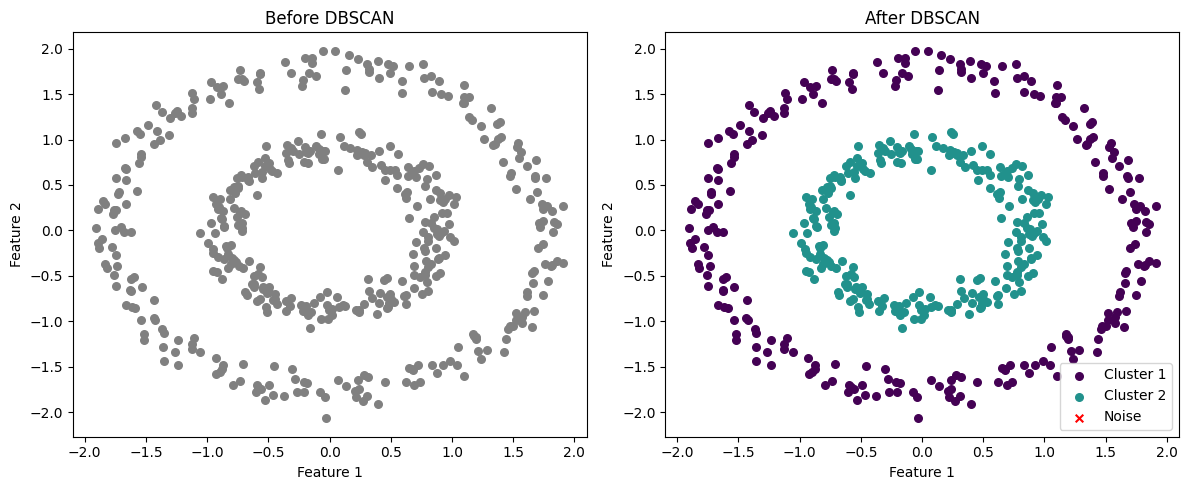

In [ ]:
# Parameters
n_samples = 500
seed = 30

# Generate circles dataset
X, labels_true = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed)

# Standardize the data
X = StandardScaler().fit_transform(X)

# Create the set_of_points object
set_of_points = SetOfPoints(X)

# Apply DBSCAN algorithm
eps = 0.3  # Choose the epsilon value (distance threshold)
min_pts = 10  # Minimum points to form a cluster

dbscan(set_of_points, eps, min_pts)

# Plotting before and after DBSCAN
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Before DBSCAN
ax[0].scatter(X[:, 0], X[:, 1], s=30, c='gray', marker='o')
ax[0].set_title("Before DBSCAN")
ax[0].set_xlabel("Feature 1")
ax[0].set_ylabel("Feature 2")

# After DBSCAN
unique_ids = np.unique(set_of_points.cl_ids)

# Create a color map for the clusters
colors = plt.cm.get_cmap("viridis", len(unique_ids) + 1)  # +1 to include noise

for idx, cl_id in enumerate(unique_ids):
    if cl_id != "UNCLASSIFIED":
        ax[1].scatter(X[set_of_points.cl_ids == cl_id][:, 0],
                       X[set_of_points.cl_ids == cl_id][:, 1],
                       s=30,
                       label=f'Cluster {cl_id}',
                       color=colors(idx))

# Plot noise points
ax[1].scatter(X[set_of_points.cl_ids == "NOISE"][:, 0],
               X[set_of_points.cl_ids == "NOISE"][:, 1],
               s=30,
               color='red',
               label='Noise',
               marker='x')

ax[1].set_title("After DBSCAN")
ax[1].set_xlabel("Feature 1")
ax[1].set_ylabel("Feature 2")
ax[1].legend()

plt.tight_layout()
plt.show()

<ipython-input-32-5148d044432a>:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("viridis", len(unique_ids) + 1)  # +1 to include noise


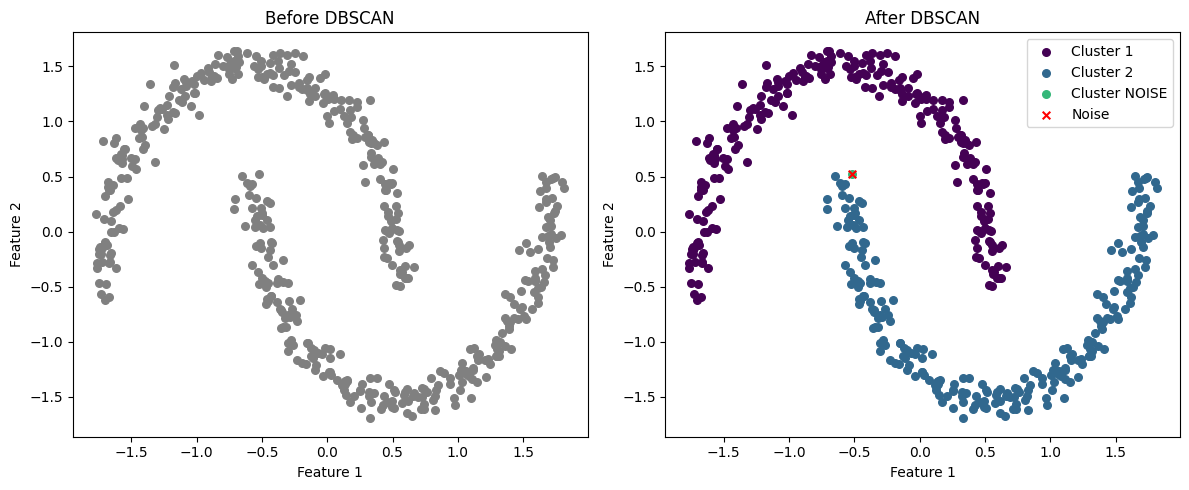

In [ ]:
# Parameters
n_samples = 500
seed = 30

# Generate moons dataset
X, labels_true = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=seed)

# Standardize the data
X = StandardScaler().fit_transform(X)

# Create the set_of_points object
set_of_points = SetOfPoints(X)

# Apply DBSCAN algorithm
eps = 0.2  # Choose the epsilon value (distance threshold)
min_pts = 10  # Minimum points to form a cluster

dbscan(set_of_points, eps, min_pts)

# Plotting before and after DBSCAN
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Before DBSCAN
ax[0].scatter(X[:, 0], X[:, 1], s=30, c='gray', marker='o')
ax[0].set_title("Before DBSCAN")
ax[0].set_xlabel("Feature 1")
ax[0].set_ylabel("Feature 2")

# After DBSCAN
unique_ids = np.unique(set_of_points.cl_ids)

# Create a color map for the clusters
colors = plt.cm.get_cmap("viridis", len(unique_ids) + 1)  # +1 to include noise

for idx, cl_id in enumerate(unique_ids):
    if cl_id != "UNCLASSIFIED":
        ax[1].scatter(X[set_of_points.cl_ids == cl_id][:, 0],
                       X[set_of_points.cl_ids == cl_id][:, 1],
                       s=30,
                       label=f'Cluster {cl_id}',
                       color=colors(idx))

# Plot noise points
ax[1].scatter(X[set_of_points.cl_ids == "NOISE"][:, 0],
               X[set_of_points.cl_ids == "NOISE"][:, 1],
               s=30,
               color='red',
               label='Noise',
               marker='x')

ax[1].set_title("After DBSCAN")
ax[1].set_xlabel("Feature 1")
ax[1].set_ylabel("Feature 2")
ax[1].legend()

plt.tight_layout()
plt.show()


<ipython-input-33-5cd91c178ff0>:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("viridis", len(unique_ids) + 1)  # +1 to include noise


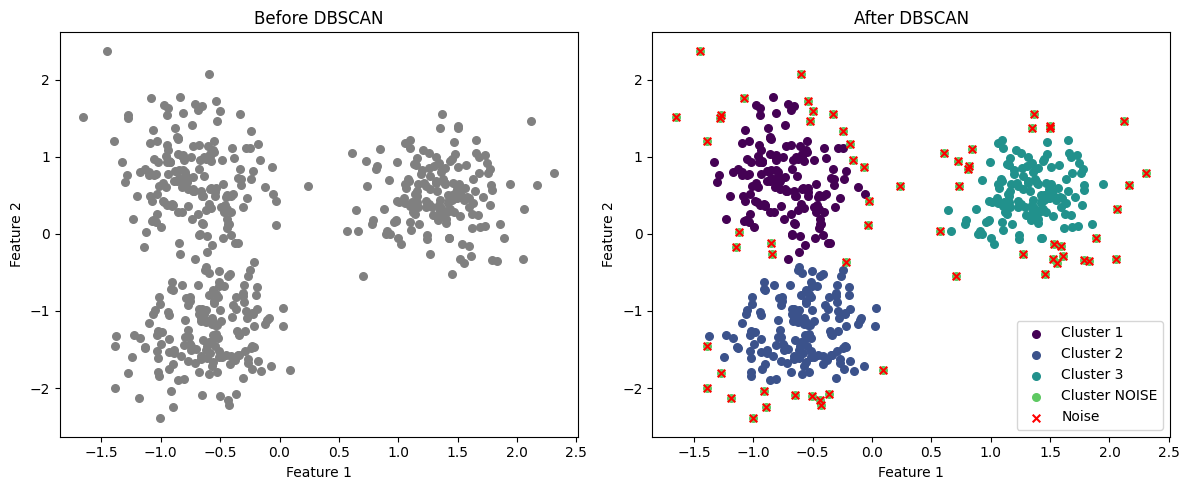

In [ ]:
#blobs = datasets.make_blobs(n_samples=n_samples, random_state=seed)
# Parameters
n_samples = 500
seed = 30

# Generate moons dataset
X, labels_true = datasets.make_blobs(n_samples=n_samples, random_state=seed)

# Standardize the data
X = StandardScaler().fit_transform(X)

# Create the set_of_points object
set_of_points = SetOfPoints(X)

# Apply DBSCAN algorithm
eps = 0.225  # Choose the epsilon value (distance threshold)
min_pts = 10  # Minimum points to form a cluster

dbscan(set_of_points, eps, min_pts)

# Plotting before and after DBSCAN
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Before DBSCAN
ax[0].scatter(X[:, 0], X[:, 1], s=30, c='gray', marker='o')
ax[0].set_title("Before DBSCAN")
ax[0].set_xlabel("Feature 1")
ax[0].set_ylabel("Feature 2")

# After DBSCAN
unique_ids = np.unique(set_of_points.cl_ids)

# Create a color map for the clusters
colors = plt.cm.get_cmap("viridis", len(unique_ids) + 1)  # +1 to include noise

for idx, cl_id in enumerate(unique_ids):
    if cl_id != "UNCLASSIFIED":
        ax[1].scatter(X[set_of_points.cl_ids == cl_id][:, 0],
                       X[set_of_points.cl_ids == cl_id][:, 1],
                       s=30,
                       label=f'Cluster {cl_id}',
                       color=colors(idx))

# Plot noise points
ax[1].scatter(X[set_of_points.cl_ids == "NOISE"][:, 0],
               X[set_of_points.cl_ids == "NOISE"][:, 1],
               s=30,
               color='red',
               label='Noise',
               marker='x')

ax[1].set_title("After DBSCAN")
ax[1].set_xlabel("Feature 1")
ax[1].set_ylabel("Feature 2")
ax[1].legend()

plt.tight_layout()
plt.show()


<ipython-input-34-d7f20a9303cb>:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("viridis", len(unique_ids) + 1)  # +1 to include noise


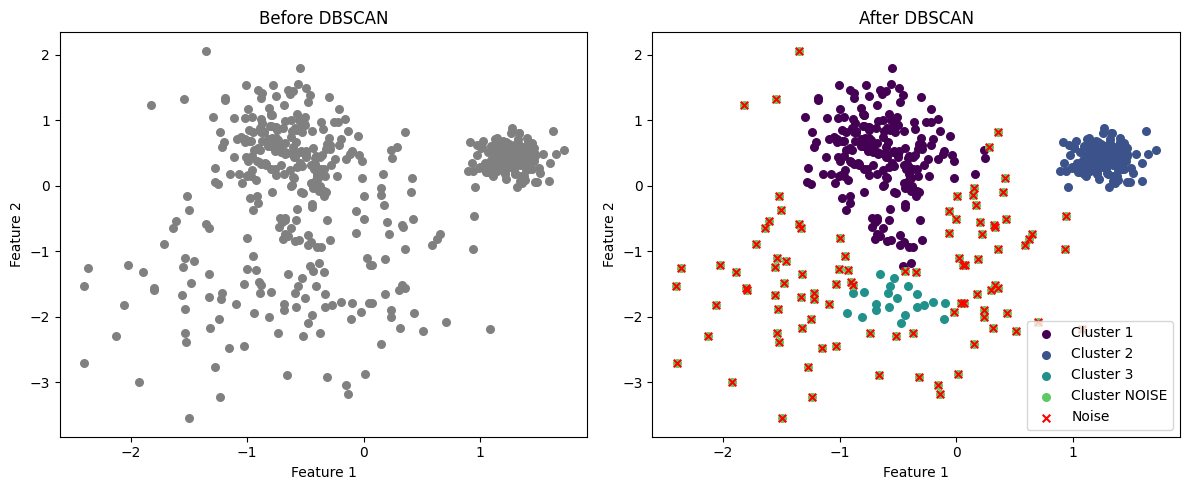

In [ ]:
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=seed
)

X, labels_true = varied

# Standardize the data
X = StandardScaler().fit_transform(X)

# Create the set_of_points object
set_of_points = SetOfPoints(X)

# Apply DBSCAN algorithm
eps = 0.3  # Choose the epsilon value (distance threshold)
min_pts = 10  # Minimum points to form a cluster

dbscan(set_of_points, eps, min_pts)

# Plotting before and after DBSCAN
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Before DBSCAN
ax[0].scatter(X[:, 0], X[:, 1], s=30, c='gray', marker='o')
ax[0].set_title("Before DBSCAN")
ax[0].set_xlabel("Feature 1")
ax[0].set_ylabel("Feature 2")

# After DBSCAN
unique_ids = np.unique(set_of_points.cl_ids)

# Create a color map for the clusters
colors = plt.cm.get_cmap("viridis", len(unique_ids) + 1)  # +1 to include noise

for idx, cl_id in enumerate(unique_ids):
    if cl_id != "UNCLASSIFIED":
        ax[1].scatter(X[set_of_points.cl_ids == cl_id][:, 0],
                       X[set_of_points.cl_ids == cl_id][:, 1],
                       s=30,
                       label=f'Cluster {cl_id}',
                       color=colors(idx))

# Plot noise points
ax[1].scatter(X[set_of_points.cl_ids == "NOISE"][:, 0],
               X[set_of_points.cl_ids == "NOISE"][:, 1],
               s=30,
               color='red',
               label='Noise',
               marker='x')

ax[1].set_title("After DBSCAN")
ax[1].set_xlabel("Feature 1")
ax[1].set_ylabel("Feature 2")
ax[1].legend()

plt.tight_layout()
plt.show()

<ipython-input-35-def578c0f9c5>:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("viridis", len(unique_ids) + 1)  # +1 to include noise


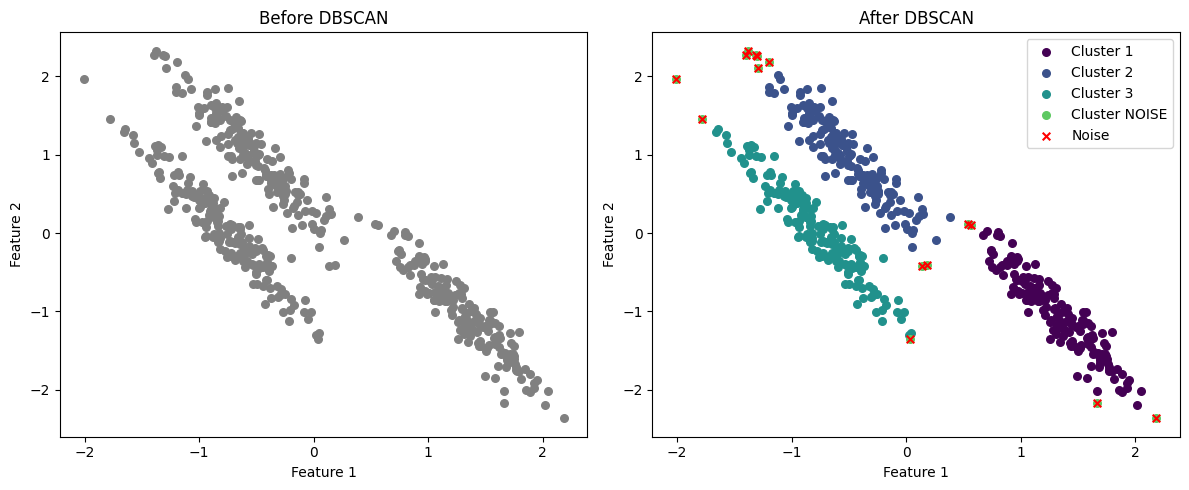

In [ ]:
# Parameters
n_samples = 500
random_state = 170

# Generate anisotropically distributed data
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)

# Standardize the data
X_aniso = StandardScaler().fit_transform(X_aniso)

# Create the set_of_points object
set_of_points = SetOfPoints(X_aniso)

# Apply DBSCAN algorithm
eps = 0.25  # Choose the epsilon value (distance threshold)
min_pts = 10  # Minimum points to form a cluster

dbscan(set_of_points, eps, min_pts)

# Plotting before and after DBSCAN
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Before DBSCAN
ax[0].scatter(X_aniso[:, 0], X_aniso[:, 1], s=30, c='gray', marker='o')
ax[0].set_title("Before DBSCAN")
ax[0].set_xlabel("Feature 1")
ax[0].set_ylabel("Feature 2")

# After DBSCAN
unique_ids = np.unique(set_of_points.cl_ids)

# Create a color map for the clusters
colors = plt.cm.get_cmap("viridis", len(unique_ids) + 1)  # +1 to include noise

for idx, cl_id in enumerate(unique_ids):
    if cl_id != "UNCLASSIFIED":
        ax[1].scatter(X_aniso[set_of_points.cl_ids == cl_id][:, 0],
                       X_aniso[set_of_points.cl_ids == cl_id][:, 1],
                       s=30,
                       label=f'Cluster {cl_id}',
                       color=colors(idx))

# Plot noise points
ax[1].scatter(X_aniso[set_of_points.cl_ids == "NOISE"][:, 0],
               X_aniso[set_of_points.cl_ids == "NOISE"][:, 1],
               s=30,
               color='red',
               label='Noise',
               marker='x')

ax[1].set_title("After DBSCAN")
ax[1].set_xlabel("Feature 1")
ax[1].set_ylabel("Feature 2")
ax[1].legend()

plt.tight_layout()
plt.show()

<ipython-input-36-07568fe9077a>:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("viridis", len(unique_ids) + 1)  # +1 to include noise


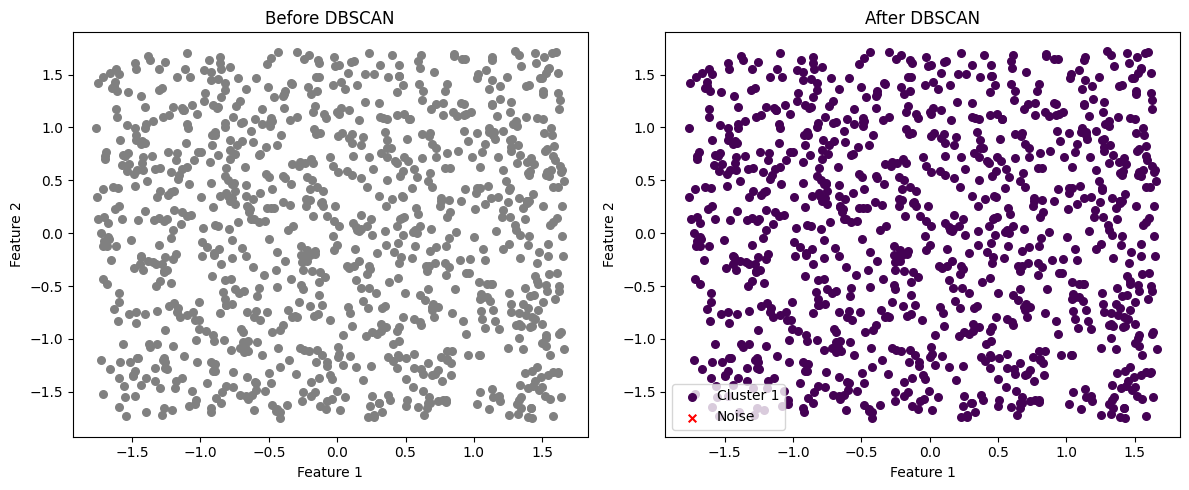

In [ ]:
# Assuming 'rng', 'n_samples', and 'seed' are already defined
n_samples = 1000
rng = np.random.RandomState(seed)
X, y = rng.rand(n_samples, 2), None  # no_structure dataset

# Standardize the data
X = StandardScaler().fit_transform(X)

# Create the set_of_points object
set_of_points = SetOfPoints(X)

# Apply DBSCAN algorithm
eps = 0.25  # Choose the epsilon value (distance threshold)
min_pts = 10  # Minimum points to form a cluster

dbscan(set_of_points, eps, min_pts)

# Plotting before and after DBSCAN
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Before DBSCAN
ax[0].scatter(X[:, 0], X[:, 1], s=30, c='gray', marker='o')
ax[0].set_title("Before DBSCAN")
ax[0].set_xlabel("Feature 1")
ax[0].set_ylabel("Feature 2")

# After DBSCAN
unique_ids = np.unique(set_of_points.cl_ids)

# Create a color map for the clusters
colors = plt.cm.get_cmap("viridis", len(unique_ids) + 1)  # +1 to include noise

for idx, cl_id in enumerate(unique_ids):
    if cl_id != "UNCLASSIFIED":
        ax[1].scatter(X[set_of_points.cl_ids == cl_id][:, 0],
                       X[set_of_points.cl_ids == cl_id][:, 1],
                       s=30,
                       label=f'Cluster {cl_id}',
                       color=colors(idx))

# Plot noise points
ax[1].scatter(X[set_of_points.cl_ids == "NOISE"][:, 0],
               X[set_of_points.cl_ids == "NOISE"][:, 1],
               s=30,
               color='red',
               label='Noise',
               marker='x')

ax[1].set_title("After DBSCAN")
ax[1].set_xlabel("Feature 1")
ax[1].set_ylabel("Feature 2")
ax[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
rng = np.random.RandomState(seed)
no_structure = rng.rand(n_samples, 2), None

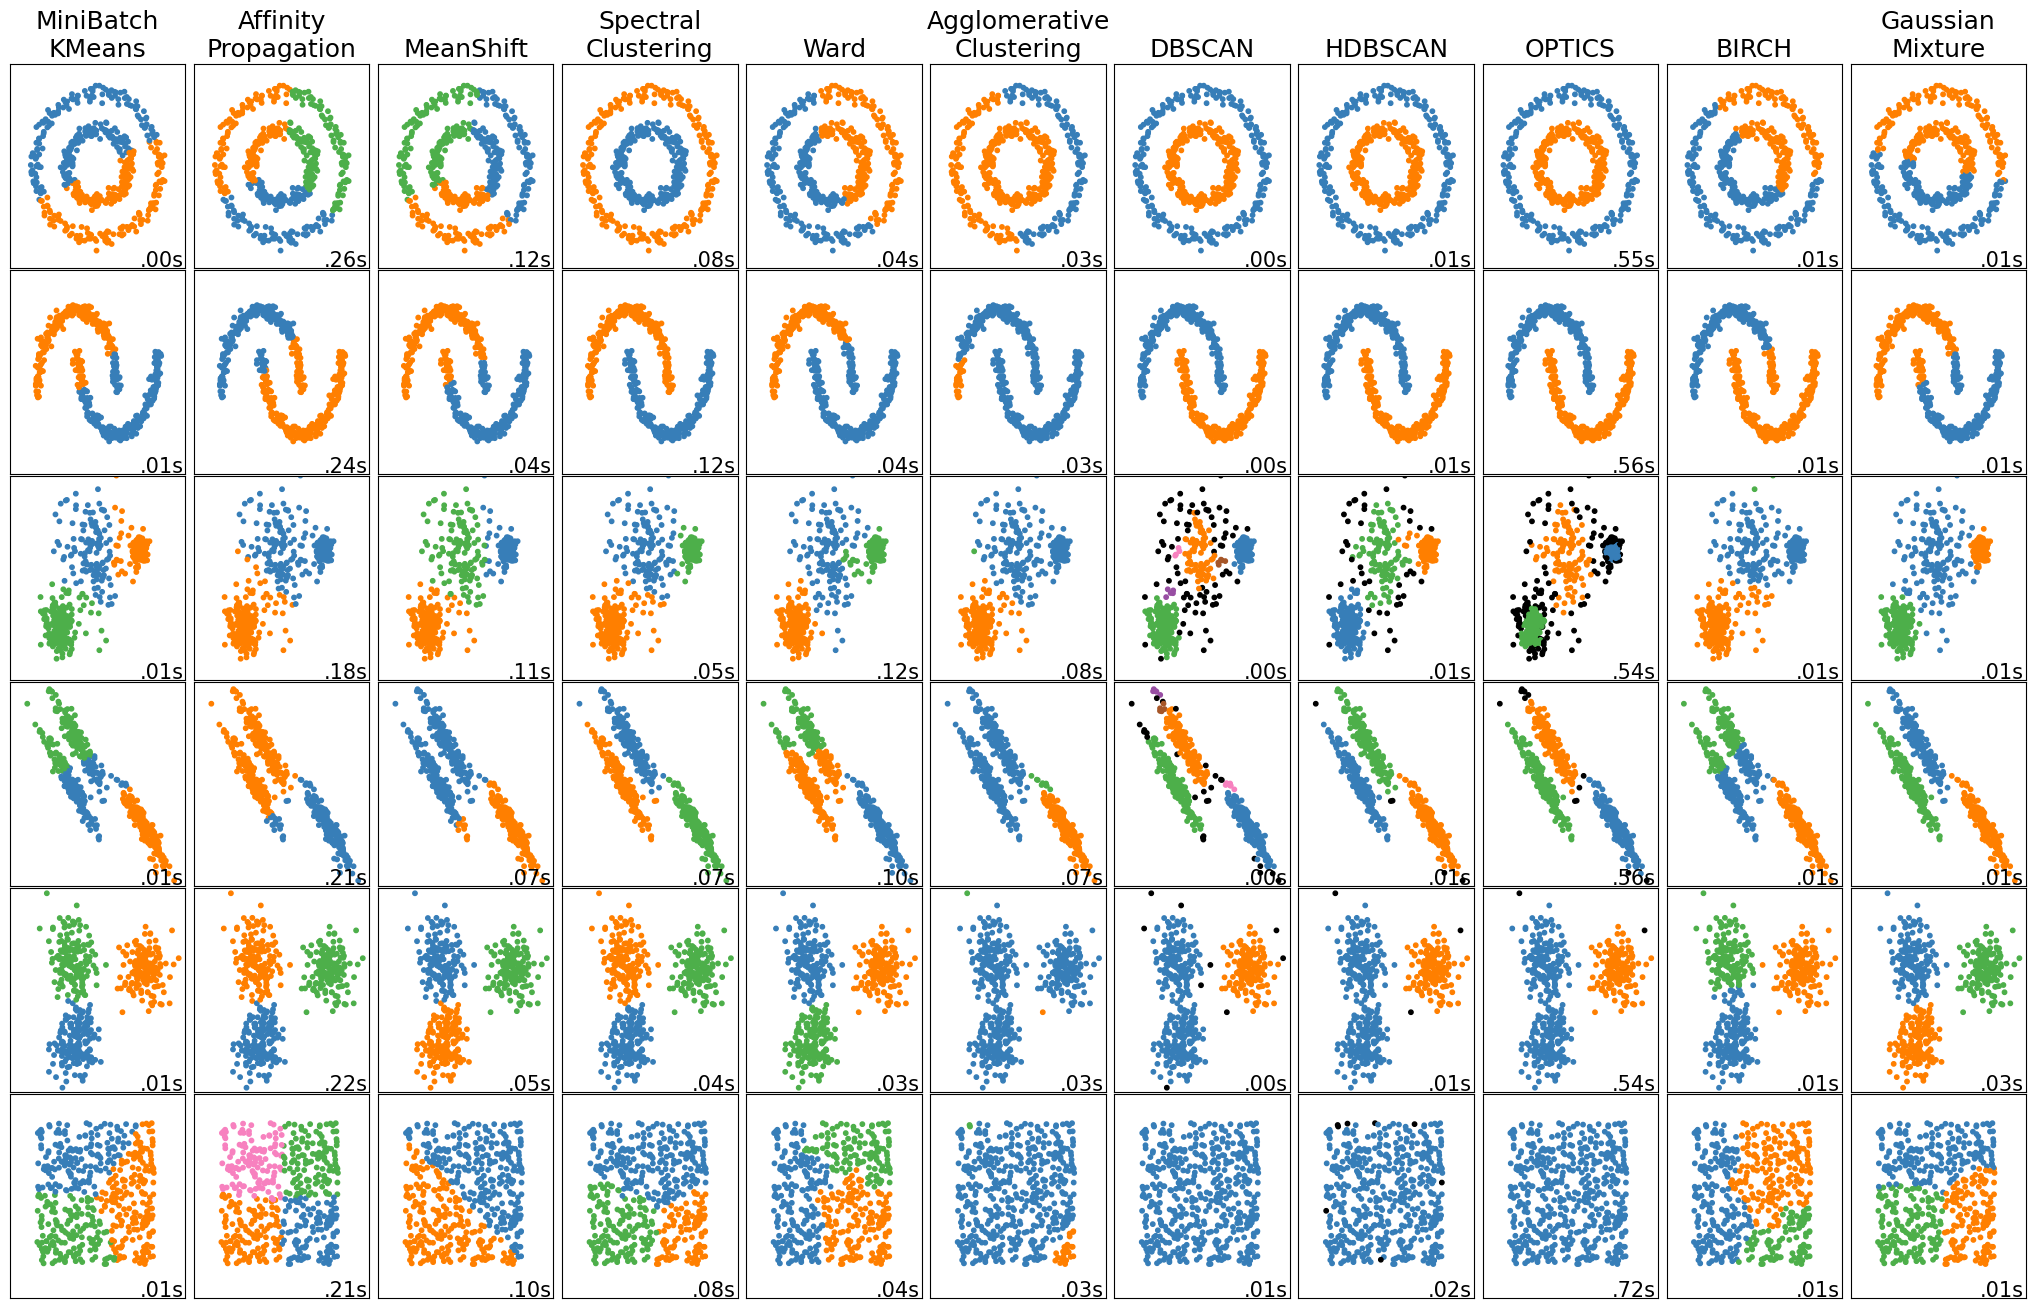

In [ ]:
import time
import warnings
from itertools import cycle, islice

import matplotlib.pyplot as plt
import numpy as np

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
seed = 30
noisy_circles = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed
)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=seed)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=seed)
rng = np.random.RandomState(seed)
no_structure = rng.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 3,
    "n_clusters": 3,
    "min_samples": 7,
    "xi": 0.05,
    "min_cluster_size": 0.1,
    "allow_single_cluster": True,
    "hdbscan_min_cluster_size": 15,
    "hdbscan_min_samples": 3,
    "random_state": 42,
}

datasets = [
    (
        noisy_circles,
        {
            "damping": 0.77,
            "preference": -240,
            "quantile": 0.2,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.08,
        },
    ),
    (
        noisy_moons,
        {
            "damping": 0.75,
            "preference": -220,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.1,
        },
    ),
    (
        varied,
        {
            "eps": 0.18,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.01,
            "min_cluster_size": 0.2,
        },
    ),
    (
        aniso,
        {
            "eps": 0.15,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.1,
            "min_cluster_size": 0.2,
        },
    ),
    (blobs, {"min_samples": 7, "xi": 0.1, "min_cluster_size": 0.2}),
    (no_structure, {}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params["n_neighbors"], include_self=False
    )
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(
        n_clusters=params["n_clusters"],
        random_state=params["random_state"],
    )
    ward = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="ward", connectivity=connectivity
    )
    spectral = cluster.SpectralClustering(
        n_clusters=params["n_clusters"],
        eigen_solver="arpack",
        affinity="nearest_neighbors",
        random_state=params["random_state"],
    )
    dbscan = cluster.DBSCAN(eps=params["eps"])
    hdbscan = cluster.HDBSCAN(
        min_samples=params["hdbscan_min_samples"],
        min_cluster_size=params["hdbscan_min_cluster_size"],
        allow_single_cluster=params["allow_single_cluster"],
    )
    optics = cluster.OPTICS(
        min_samples=params["min_samples"],
        xi=params["xi"],
        min_cluster_size=params["min_cluster_size"],
    )
    affinity_propagation = cluster.AffinityPropagation(
        damping=params["damping"],
        preference=params["preference"],
        random_state=params["random_state"],
    )
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average",
        metric="cityblock",
        n_clusters=params["n_clusters"],
        connectivity=connectivity,
    )
    birch = cluster.Birch(n_clusters=params["n_clusters"])
    gmm = mixture.GaussianMixture(
        n_components=params["n_clusters"],
        covariance_type="full",
        random_state=params["random_state"],
    )

    clustering_algorithms = (
        ("MiniBatch\nKMeans", two_means),
        ("Affinity\nPropagation", affinity_propagation),
        ("MeanShift", ms),
        ("Spectral\nClustering", spectral),
        ("Ward", ward),
        ("Agglomerative\nClustering", average_linkage),
        ("DBSCAN", dbscan),
        ("HDBSCAN", hdbscan),
        ("OPTICS", optics),
        ("BIRCH", birch),
        ("Gaussian\nMixture", gmm),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the "
                + "connectivity matrix is [0-9]{1,2}"
                + " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning,
            )
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding"
                + " may not work as expected.",
                category=UserWarning,
            )
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, "labels_"):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plot_num += 1

plt.show()


**HDBSCAN**


In [ ]:
class SetOfPoints:
    def __init__(self, X, mpts):
        self.X = X
        self.mpts = mpts
        self.core_distances = self.compute_core_distances()
        self.mst = None  # To store the minimum spanning tree
        self.hierarchy = []  # To store the hierarchical clusters as dendrogram levels

    def compute_core_distances(self):
        # Compute pairwise distances
        distances = squareform(pdist(self.X, 'euclidean'))
        core_distances = np.full(len(self.X), np.inf)

        # For each point, calculate the distance to its mpts-nearest neighbor
        for i, dist_row in enumerate(distances):
            sorted_distances = np.sort(dist_row)
            core_distances[i] = sorted_distances[self.mpts]  # mpts-nearest neighbor distance

        return core_distances

    def mutual_reachability_distance(self):
        # Calculate the mutual reachability distance matrix
        n = len(self.X)
        mreach_dist = np.zeros((n, n))

        for i in range(n):
            for j in range(n):
                if i != j:
                    mreach_dist[i, j] = max(self.core_distances[i], self.core_distances[j], np.linalg.norm(self.X[i] - self.X[j]))

        return csr_matrix(mreach_dist)  # Sparse matrix for efficient storage

    def construct_mst(self):
        # Compute MST using the mutual reachability distance
        mutual_reachability_graph = self.mutual_reachability_distance()
        mst = minimum_spanning_tree(mutual_reachability_graph)
        self.mst = mst

    def extend_mst(self):
        # Extend MST by adding self-edges with core distances as weights
        n = len(self.X)
        extended_mst = self.mst.toarray()
        for i in range(n):
            extended_mst[i, i] = self.core_distances[i]
        self.mst = csr_matrix(extended_mst)  # Store as a sparse matrix again

    def extract_hierarchy(self):
        # Generate a dendrogram by iteratively removing edges in decreasing order of weights
        mst_array = self.mst.toarray()
        edges = [(i, j, mst_array[i, j]) for i in range(len(self.X)) for j in range(i+1, len(self.X)) if mst_array[i, j] > 0]
        edges = sorted(edges, key=lambda x: -x[2])  # Sort edges by weight in descending order

        # Initialize hierarchy
        current_clusters = {i: i for i in range(len(self.X))}  # Each point starts as its own cluster
        cluster_labels = np.full(len(self.X), -1)  # Start with all points as "noise"

        # Root of dendrogram: all points in a single cluster
        self.hierarchy.append((0, list(range(len(self.X)))))

        for (i, j, weight) in edges:
            if current_clusters[i] != current_clusters[j]:
                cluster_id = min(current_clusters[i], current_clusters[j])
                for k in range(len(self.X)):
                    if current_clusters[k] == current_clusters[i] or current_clusters[k] == current_clusters[j]:
                        current_clusters[k] = cluster_id
                self.hierarchy.append((weight, [k for k in range(len(self.X)) if current_clusters[k] == cluster_id]))

    def run_hdbscan(self):
        self.construct_mst()
        self.extend_mst()
        self.extract_hierarchy()
        return self.hierarchy


In [ ]:
def hdbscan(X, mpts):
    set_of_points = SetOfPoints(X, mpts)
    hierarchy = set_of_points.run_hdbscan()
    return hierarchy